In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import spectral
# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.bsq'
header_file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)




Reading HS data
Shape of hyperspectral data: (128, 2517, 2335)
Number of bands: 128
Shape of hyperspectral data: (2517, 2335, 128)
Number of bands: 128
Wavelengths: [0.36259, 0.36775, 0.3729, 0.37807, 0.38323, 0.38839, 0.39355, 0.39871, 0.40387, 0.40903, 0.41419, 0.41936, 0.42452, 0.42968, 0.43484, 0.44, 0.44516, 0.45032, 0.45548, 0.46064, 0.4658, 0.47096, 0.47612, 0.48129, 0.48645, 0.49161, 0.49677, 0.50193, 0.50709, 0.51225, 0.51741, 0.52257, 0.52773, 0.53289, 0.53806, 0.54321, 0.54838, 0.55354, 0.5587, 0.56386, 0.56902, 0.57418, 0.57934, 0.5845, 0.58966, 0.59483, 0.59999, 0.60514, 0.61031, 0.61547, 0.62063, 0.62579, 0.63095, 0.63611, 0.64127, 0.64643, 0.65159, 0.65675, 0.66192, 0.66707, 0.67224, 0.6774, 0.68256, 0.68772, 0.69288, 0.69804, 0.7032, 0.70836, 0.71352, 0.71868, 0.72385, 0.72901, 0.73417, 0.73933, 0.74449, 0.74965, 0.75481, 0.75997, 0.76513, 0.77029, 0.77545, 0.78061, 0.78578, 0.79094, 0.7961, 0.80126, 0.80642, 0.81158, 0.81674, 0.8219, 0.82706, 0.83223, 0.83738, 0.84254,

In [44]:
#Open the image with spectral
img_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = img_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', img_spectral.shape)
print('Number of bands:', img_spectral.shape[2])
print('Wavelengths:', wavelengths)

[attr for attr in dir(img_spectral) if "__" not in attr]

Shape of hyperspectral data: (2517, 2335, 128)
Number of bands: 128
Wavelengths: [0.36259, 0.36775, 0.3729, 0.37807, 0.38323, 0.38839, 0.39355, 0.39871, 0.40387, 0.40903, 0.41419, 0.41936, 0.42452, 0.42968, 0.43484, 0.44, 0.44516, 0.45032, 0.45548, 0.46064, 0.4658, 0.47096, 0.47612, 0.48129, 0.48645, 0.49161, 0.49677, 0.50193, 0.50709, 0.51225, 0.51741, 0.52257, 0.52773, 0.53289, 0.53806, 0.54321, 0.54838, 0.55354, 0.5587, 0.56386, 0.56902, 0.57418, 0.57934, 0.5845, 0.58966, 0.59483, 0.59999, 0.60514, 0.61031, 0.61547, 0.62063, 0.62579, 0.63095, 0.63611, 0.64127, 0.64643, 0.65159, 0.65675, 0.66192, 0.66707, 0.67224, 0.6774, 0.68256, 0.68772, 0.69288, 0.69804, 0.7032, 0.70836, 0.71352, 0.71868, 0.72385, 0.72901, 0.73417, 0.73933, 0.74449, 0.74965, 0.75481, 0.75997, 0.76513, 0.77029, 0.77545, 0.78061, 0.78578, 0.79094, 0.7961, 0.80126, 0.80642, 0.81158, 0.81674, 0.8219, 0.82706, 0.83223, 0.83738, 0.84254, 0.84771, 0.85287, 0.85803, 0.86319, 0.86835, 0.87351, 0.87867, 0.88383, 0.88899, 0.

['_disable_memmap',
 '_fix_negative_indices',
 '_memmap',
 '_open_memmap',
 'asarray',
 'bands',
 'byte_order',
 'dtype',
 'fid',
 'filename',
 'interleave',
 'load',
 'metadata',
 'nbands',
 'ncols',
 'nrows',
 'offset',
 'open_memmap',
 'params',
 'read_band',
 'read_bands',
 'read_datum',
 'read_pixel',
 'read_subimage',
 'read_subregion',
 'sample_size',
 'scale_factor',
 'set_params',
 'shape',
 'swap',
 'transform',
 'using_memmap']

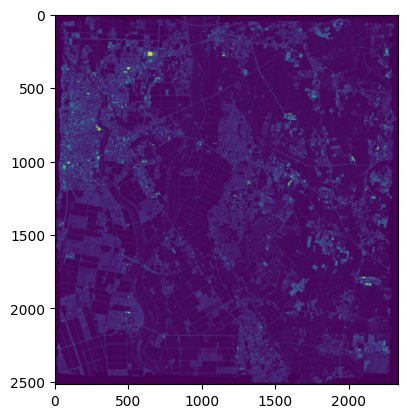

In [2]:
#Let's show specific wavelengths
ind = wavelengths.index(0.46064)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

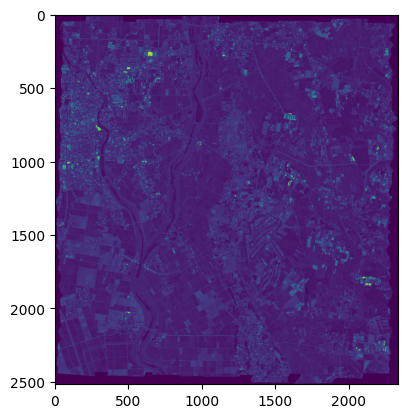

In [3]:
ind = wavelengths.index(0.56386)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()


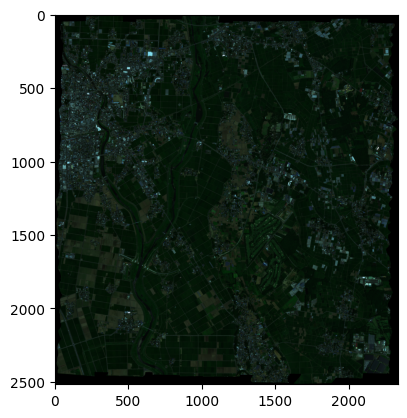

In [36]:

#Let's combine a short, middle and long wavelength
img = np.zeros([img_spectral.shape[0], img_spectral.shape[1], 3], np.float32)

ind1 = wavelengths.index(0.46064)
ind2 = wavelengths.index(0.56386)
ind3 = wavelengths.index(0.67224)
min1 = np.min(hyperspectral_data[ind1,:,:])
min2 = np.min(hyperspectral_data[ind2,:,:])
min3 = np.min(hyperspectral_data[ind3,:,:])
max1 = np.max(hyperspectral_data[ind1,:,:])
max2 = np.max(hyperspectral_data[ind2,:,:])
max3 = np.max(hyperspectral_data[ind3,:,:])

img[:,:,2] = (hyperspectral_data[ind1,:,:]-min1)/(max1 - min1)
img[:,:,1] = (hyperspectral_data[ind2,:,:]-min2)/(max2 - min2)
img[:,:,0] = (hyperspectral_data[ind3,:,:]-min3)/(max3 - min3)
plt.imshow(img)
plt.show()